In [350]:
# SUNLIGHT: -4% production of orchids / 10 mins below 7 total hours
# HUMIDITY: -2% production of orchids / 5% abs below 60% or above 80% humidity

In [351]:
import pandas as pd

data1 = pd.read_csv("prices_round_2_day_-1.csv", sep=';')
data2 = pd.read_csv("prices_round_2_day_0.csv", sep=';')
data3 = pd.read_csv("prices_round_2_day_1.csv", sep=';')
data_list = [data1, data2, data3]

for data in data_list:
    sunlight = data["SUNLIGHT"]
    humidity = data["HUMIDITY"]
    orchids = data["ORCHIDS"]
    time_stamp = data["timestamp"]
    day = data["DAY"]
    AVERAGE_SUNLIGHT = 2500
    PERFECT_HUMIDITY = 70
    HUMIDITY_RANGE = 10
    
    predicted_orchids_list = list()
    predicted_orchids_list.append(orchids[0])
    
    for i in range(len(time_stamp)):
        current_humidity = humidity[i]
        current_sunlight = sunlight[i]
    
        humidity_red = 1
        humidity_dev = abs(current_humidity - PERFECT_HUMIDITY)
        if humidity_dev > HUMIDITY_RANGE:
            humidity_change = (humidity_dev / 5) - 2
            humidity_red = round(1 - humidity_change * 0.007, 3)
            
        # sunlight_red = 1
        # if current_sunlight < AVERAGE_SUNLIGHT:
        sunlight_dev = current_sunlight - AVERAGE_SUNLIGHT
        sunlight_red = 1 + sunlight_dev / (AVERAGE_SUNLIGHT * 40)
        if i + 1 < 10001:
            predicted_orchids = orchids[i + 1] * humidity_red * sunlight_red
            predicted_orchids_list.append(predicted_orchids)
    
    data["P_ORCHIDS"] = predicted_orchids_list


In [352]:
import math
# print("Average Orchids: " + str(data["ORCHIDS"].mean())
#       + "\nAverage Predicted Orchids: " + str(data["P_ORCHIDS"].mean()))
orchids_rsme_list = list()
for data in data_list:
    predicted_orchid_data = data["P_ORCHIDS"]
    curr_pred_sq_sum = 0
    for i in range(1001):
        current_orchid = data["ORCHIDS"][i]
        predicted_orchid = predicted_orchid_data[i]
        curr_min_pred = current_orchid - predicted_orchid
        curr_pred_sq_sum += math.pow(curr_min_pred, 2)
    orchids_mse = curr_pred_sq_sum / 1001
    orchids_rmse = math.sqrt(orchids_mse)
    orchids_rsme_list.append(orchids_rmse)
    print(str(orchids_rmse))
        

1.6600645858263892
1.811231093081145
8.298545694016159


RSME: 1.6600645858263892


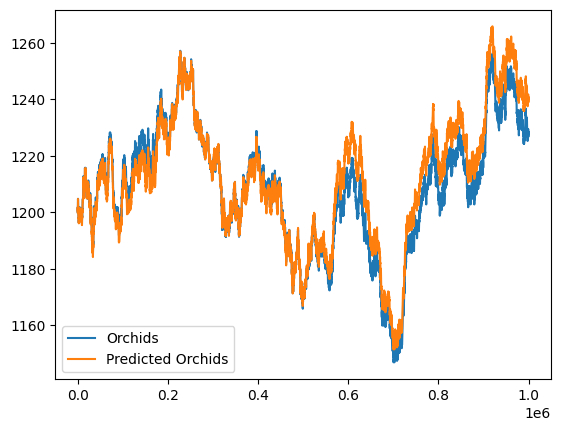

In [353]:
import matplotlib.pyplot as plt

plt.plot(data1["timestamp"], data1["ORCHIDS"], label="Orchids")
plt.plot(data1["timestamp"], data1["P_ORCHIDS"], label="Predicted Orchids")
plt.legend(loc = 'best')
print("RSME: " + str(orchids_rsme_list[0]))

RSME: 1.811231093081145


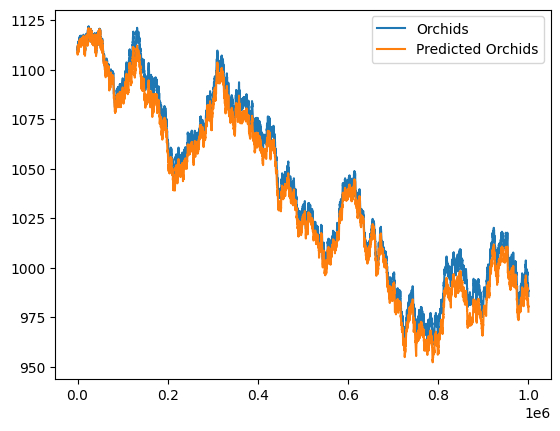

In [354]:
plt.plot(data2["timestamp"], data2["ORCHIDS"], label="Orchids")
plt.plot(data2["timestamp"], data2["P_ORCHIDS"], label="Predicted Orchids")
plt.legend(loc = 'best')
print("RSME: " + str(orchids_rsme_list[1]))

RSME: 8.298545694016159


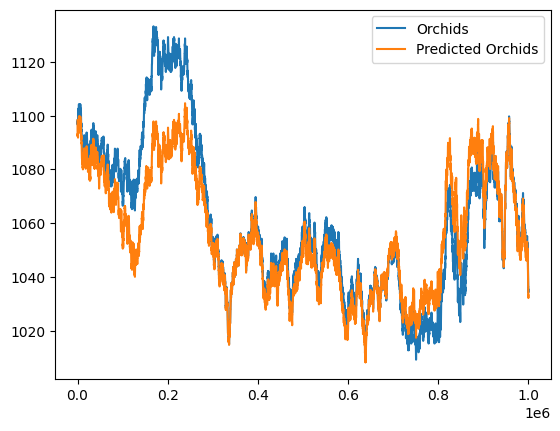

In [355]:
plt.plot(data3["timestamp"], data3["ORCHIDS"], label="Orchids")
plt.plot(data3["timestamp"], data3["P_ORCHIDS"], label="Predicted Orchids")
plt.legend(loc = 'best')
print("RSME: " + str(orchids_rsme_list[2]))